<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Conv_NN/_01_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Multilayer peceptron mnist

## Training an MLP to classify images from the MNIST database handwritten digit database.

## Process will be broken down into following steps:
- Load and visyalize the data
- Define a neural network
- Train the model
- Evaluate the performance of a trained model on test dataset.

In [4]:
# importing libraries
import torch
import numpy as np

## Loading and visualizing the data

In [5]:
from torchvision import datasets
from torchvision.transforms import transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data',train=False,download=True,transform=transform)

# prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_data,batch_size = batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, num_workers=num_workers)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


## Visualize a batch of training data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

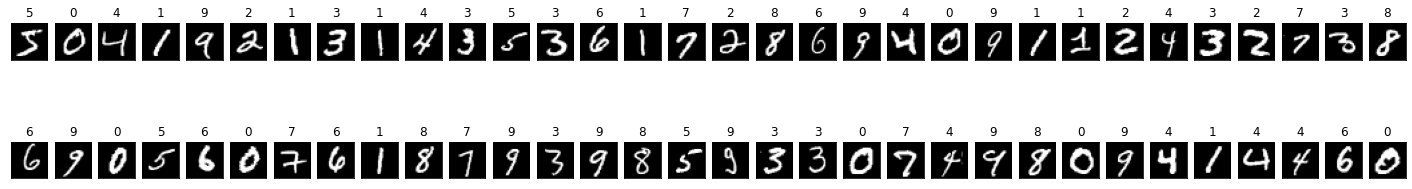

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()

# Plot the images in the batch, along with corresponding labels
fig = plt.figure(figsize=(25,4))
for idx in np.arange(64):
  ax = fig.add_subplot(2,64/2,idx+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  # print out the correct label for each image
  ax.set_title(str(labels[idx].item()))

# View one image in more detail

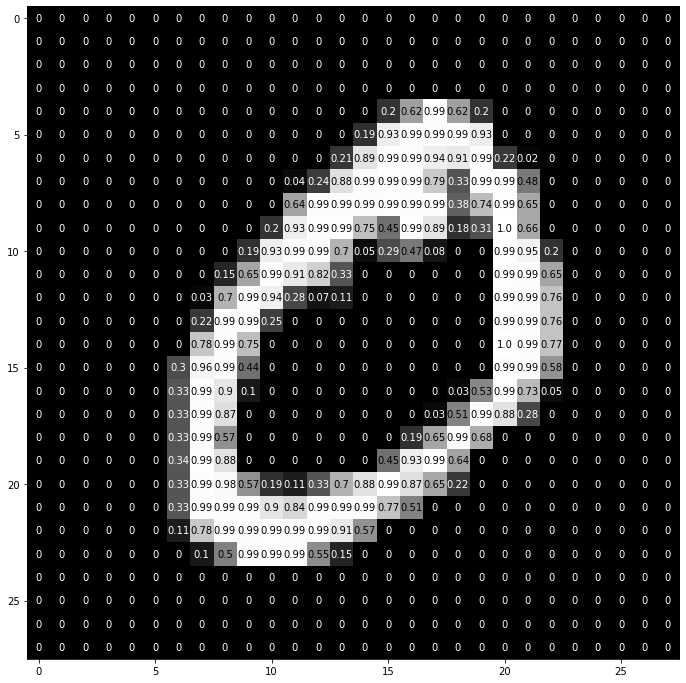

In [22]:
img = np.squeeze(images[1])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width,height = img.shape
thresh = img.max()/2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

# Define the network architecture

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    # number of hidden nodes in each layer
    hidden_1 = 512
    hidden_2 = 512
    # linear layer (input_nodes x hidden_1)
    self.fc1 = nn.Linear(784, hidden_1)
    # linear layer (hidden_1 x hidden_2)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    # linear layer (hidden_2 x output_nodes)
    self.fc3 = nn.Linear(hidden_2, 10)
    # dropout layer(p=0.2)
    # dropout prevents overfitting of data
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    # flatten image input
    x = x.view(-1,28*28)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.dropout(x)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc2(x))
    # add dropout layer
    x = self.dropout(x)
    x = self.fc3(x)
    return x

# initialize the NN
model = Net()
print (model)


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Specify Loss Function and Optimizer

It's recommended that you use cross-entropy loss for classification. PyTorch's cross entropy function applies a softmax funtion to the output layer and then calculates the log loss.

In [24]:
# specify loss function (categorical cross entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the network
Steps for training a batch of data:
- Clear the gradients of all optimized variables
- Forward pass: compute the predicted outputs by passing inputs to the model
- Calculate the loss
- Backward pass: compute gradient of the loss with respect to model parameters
- Perform a single optimization step (parameter update)
- Update average training loss


In [27]:
# number of epochs to train the model
epochs = 50

model.train()   # prep model for training
for epoch in range(epochs):
  # monitor training loss
  training_loss = 0.0
  ###################
  # train the model #
  ###################

  for data,target in train_loader:
    # clear the gradients of all the optimized variables
    optimizer.zero_grad()
    # Forward pass: compute the predicted outputs by passing inputs to the model
    output = model(data)
    # Calculate the loss
    loss = criterion(output,target)
    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step
    optimizer.step()
    # update running training loss
    training_loss += loss.item()*data.size(0)
  
  # print training statistics
  # calculate avergae loss over an epoch
  training_loss = training_loss/len(train_loader.sampler)

  print ('Epoch: {}/{} \t Training Loss: {:.6f}'.format(epoch+1,epochs,training_loss))

Epoch: 1/50 	 Training Loss: 0.554986
Epoch: 2/50 	 Training Loss: 0.415519
Epoch: 3/50 	 Training Loss: 0.363547
Epoch: 4/50 	 Training Loss: 0.329861
Epoch: 5/50 	 Training Loss: 0.300674
Epoch: 6/50 	 Training Loss: 0.278228
Epoch: 7/50 	 Training Loss: 0.257150
Epoch: 8/50 	 Training Loss: 0.238595
Epoch: 9/50 	 Training Loss: 0.224924
Epoch: 10/50 	 Training Loss: 0.208956
Epoch: 11/50 	 Training Loss: 0.196189
Epoch: 12/50 	 Training Loss: 0.184268
Epoch: 13/50 	 Training Loss: 0.175777
Epoch: 14/50 	 Training Loss: 0.166016
Epoch: 15/50 	 Training Loss: 0.157673
Epoch: 16/50 	 Training Loss: 0.151205
Epoch: 17/50 	 Training Loss: 0.143320
Epoch: 18/50 	 Training Loss: 0.137318
Epoch: 19/50 	 Training Loss: 0.133172
Epoch: 20/50 	 Training Loss: 0.126245
Epoch: 21/50 	 Training Loss: 0.121312
Epoch: 22/50 	 Training Loss: 0.116513
Epoch: 23/50 	 Training Loss: 0.113296
Epoch: 24/50 	 Training Loss: 0.109127
Epoch: 25/50 	 Training Loss: 0.104714
Epoch: 26/50 	 Training Loss: 0.10

## Test the Trained Network

Finally, we test our best model on previously unseen test data and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.



In [28]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data,target in test_loader:
  # forward pass: compute predicted outputs by passing inputs to the model
  output = model(data)
  # calculate the loss
  loss = criterion(output,target)
  # update test loss
  test_loss += loss.item()*data.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output,1)
  # comapre predictions to true label
  correct = np.squeeze(pred.eq(target.data.view_as(pred)))
  # calculate test accuracy for each object class
  for i in range(len(target)):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print ('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
  
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.065456

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 97% (1008/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 98% (966/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 98% (940/958)
Test Accuracy of     7: 97% (1000/1028)
Test Accuracy of     8: 97% (947/974)
Test Accuracy of     9: 96% (975/1009)

Test Accuracy (Overall): 97% (9792/10000)


## Visualize sample test results
This cell displays test images and their labels in this format: predicted (ground-truth). The text will be green for accurately classified examples and red for incorrect predictions.

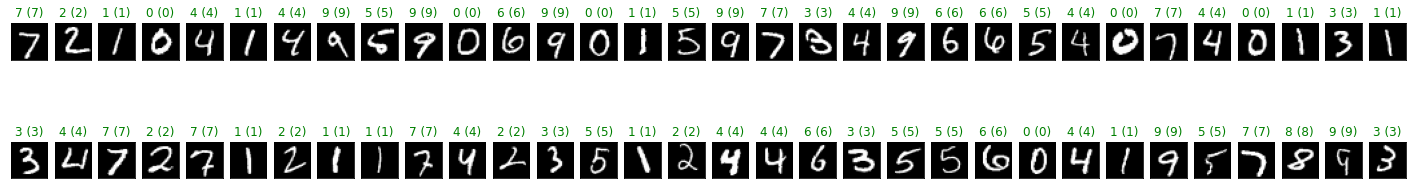

In [35]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)

# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(64):
    ax = fig.add_subplot(2, 64/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Model Validation

![Screenshot 2020-07-06 at 12 35 19](https://user-images.githubusercontent.com/26361028/86565274-288b6100-bf85-11ea-8045-e66efa0206cc.png)
![Screenshot 2020-07-06 at 12 37 12](https://user-images.githubusercontent.com/26361028/86565421-6b4d3900-bf85-11ea-9b1d-3dc7089a93d1.png)


In [36]:
# MLP with validation

In [37]:
import torch
import numpy as np

In [38]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [39]:
# number of subprocesses to use for data loading
num_workers = 0
# how many sample per batch to load
batch_size = 64
# percentage of training set to use validation
valid_size = 0.2

# convert data to torch.FloatTensor()
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='data',train=True,download=True,transform=transform)

In [42]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx,valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

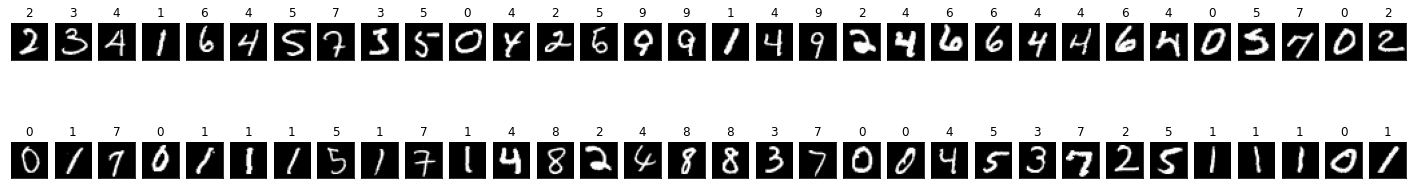

In [43]:
# Visualize a batch of training data
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(64):
    ax = fig.add_subplot(2, 64/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

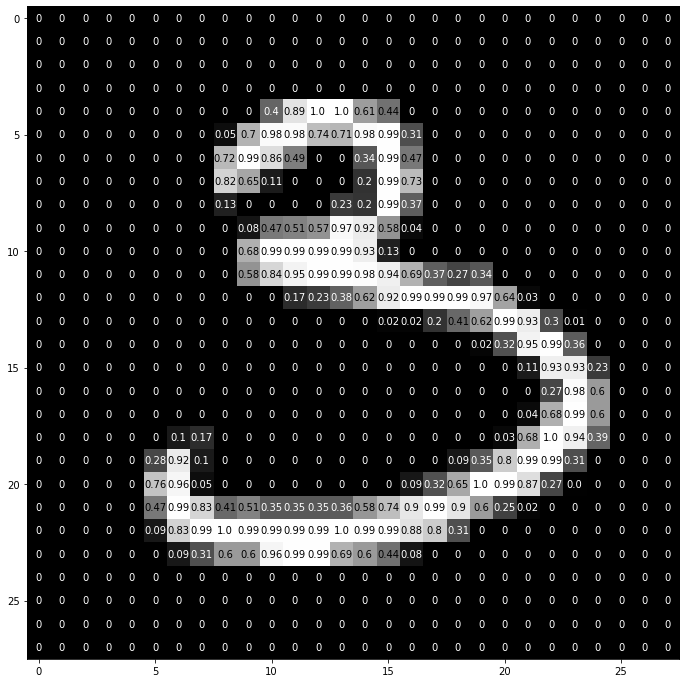

In [44]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [45]:
# Define the network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # number of hidden nodes in each layer
    hidden_1 = 512
    hidden_2 = 512
    # linear layer (784 x hidden_1)
    self.fc1 = nn.Linear(784,hidden_1)
    # linear layer (hidden_1 x hidden_2)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    # linear layer (hidden_2 x 10)
    self.fc3 = nn.Linear(hidden_2,10)
    # dropout layer
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    # flatten the image input
    x = x.view(-1,784)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout laer
    x = self.dropout(x)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc2(x))
    # add dropout layer
    x = self.dropout(x)
    # add output layer
    x = self.fc3(x)
    return x

model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [46]:
# Specify Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()

# Specify optimizer(SGD) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [47]:
# Train the network

epochs = 50

# initialize the tracker for minimum validation loss
valid_loss_min = np.Inf   # set initial minimum to infinity

for epoch in range(epochs):
  # monitor training loss
  train_loss = 0.0
  valid_loss = 0.0

  # train the model
  model.train() # prep the model for training
  for data,target in train_loader:
    # clear the gradients of all optimized varaibles
    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output,target)
    # backward pass: compute gradient of the loss with respect to the model parameters
    loss.backward()
    # perform single opimization step
    optimizer.step()
    # update training loss
    train_loss += loss.item()*data.size(0)

  # validate the model
  model.eval()  # prep model for evaluation
  for data, target in valid_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output,target)
    # update running validation loss
    valid_loss += loss.item()*data.size(0)

  # print training/validation statistics
  # calculate average loss over an epoch
  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)

  print('Epoch: {}/{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1,
        epochs, 
        train_loss,
        valid_loss
        ))

  # save model if validation loss has decreased
  if valid_loss <= valid_loss_min:
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

Epoch: 1/50 	Training Loss: 1.760022 	Validation Loss: 0.872976
Validation loss decreased (inf --> 0.872976).  Saving model ...
Epoch: 2/50 	Training Loss: 0.644739 	Validation Loss: 0.465086
Validation loss decreased (0.872976 --> 0.465086).  Saving model ...
Epoch: 3/50 	Training Loss: 0.454166 	Validation Loss: 0.380424
Validation loss decreased (0.465086 --> 0.380424).  Saving model ...
Epoch: 4/50 	Training Loss: 0.387336 	Validation Loss: 0.343207
Validation loss decreased (0.380424 --> 0.343207).  Saving model ...
Epoch: 5/50 	Training Loss: 0.354121 	Validation Loss: 0.316940
Validation loss decreased (0.343207 --> 0.316940).  Saving model ...
Epoch: 6/50 	Training Loss: 0.326660 	Validation Loss: 0.296733
Validation loss decreased (0.316940 --> 0.296733).  Saving model ...
Epoch: 7/50 	Training Loss: 0.302105 	Validation Loss: 0.277667
Validation loss decreased (0.296733 --> 0.277667).  Saving model ...
Epoch: 8/50 	Training Loss: 0.282091 	Validation Loss: 0.263627
Validation

# Load the model with lowest validation loss

In [48]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

# Test the trained network

In [49]:
#initialize the lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()  # prep the model for evaluation 

for data,target in test_loader:
  # forward pass: compute predicted outputs by passing inputs to the model
  output = model(data)
  # calculate the loss
  loss = criterion(output, target)
  # update test loss 
  test_loss += loss.item()*data.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  # compare predictions to true label
  correct = np.squeeze(pred.eq(target.data.view_as(pred)))
  # calculate test accuracy for each object class
  for i in range(len(target)):
      label = target.data[i]
      class_correct[label] += correct[i].item()
      class_total[label] += 1  

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i],np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.056789

Test Accuracy of     0: 99% (5864/5923)
Test Accuracy of     1: 99% (6684/6742)
Test Accuracy of     2: 98% (5870/5958)
Test Accuracy of     3: 97% (5990/6131)
Test Accuracy of     4: 98% (5743/5842)
Test Accuracy of     5: 98% (5336/5421)
Test Accuracy of     6: 99% (5864/5918)
Test Accuracy of     7: 98% (6172/6265)
Test Accuracy of     8: 97% (5730/5851)
Test Accuracy of     9: 97% (5787/5949)

Test Accuracy (Overall): 98% (59040/60000)


# Visualize sample test results

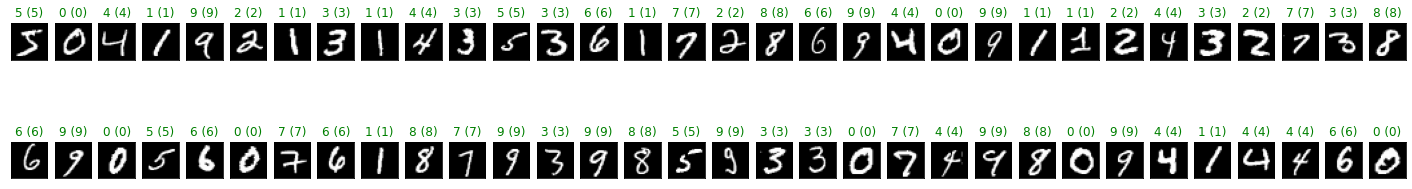

In [50]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(64):
    ax = fig.add_subplot(2, 64/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Validation Set: Takeaways
We create a validation set to

- Measure how well a model generalizes, during training
- Tell us when to stop training a model; when the validation loss stops decreasing (and especially when the validation loss starts increasing and the training loss is still decreasing)